# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv("demo01_pronta.csv")
df.columns

Index(['Unnamed: 0', 'qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau', 'sexo_M', 'posse_de_veiculo_Y',
       'posse_de_imovel_Y', 'tipo_renda_Pensioner', 'tipo_renda_State servant',
       'tipo_renda_Student', 'tipo_renda_Working', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Married',
       'estado_civil_Separated', 'estado_civil_Single / not married',
       'estado_civil_Widow', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

In [5]:
y = df['mau']

X = df.drop('mau', axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [8]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

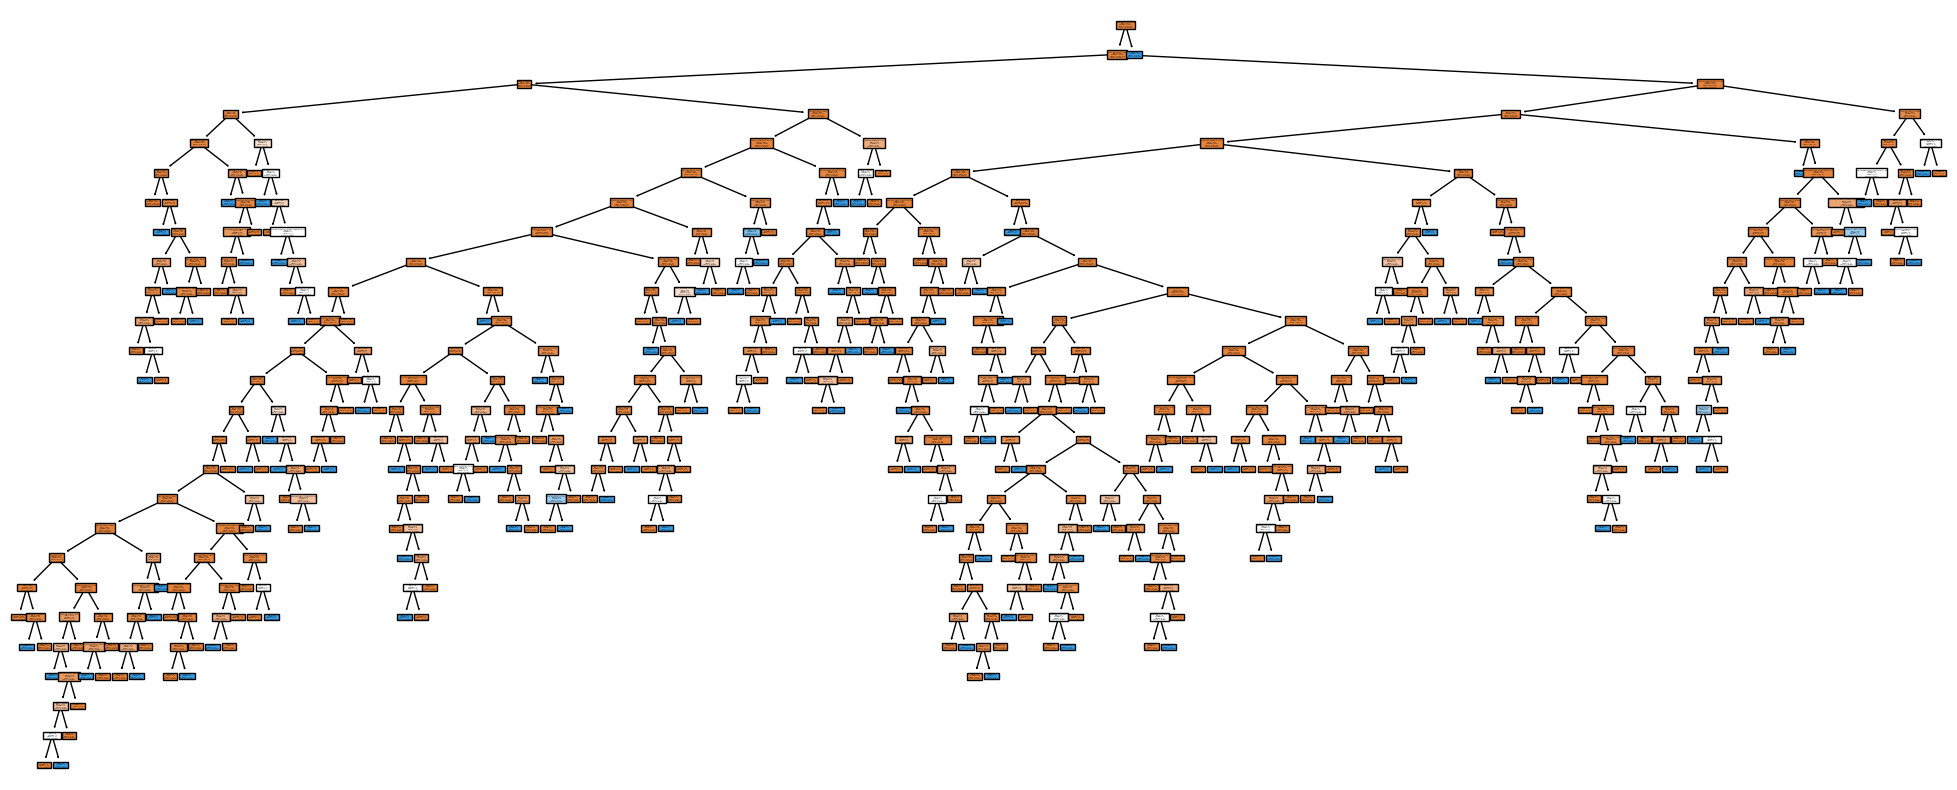

In [9]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=list(X_train.columns));

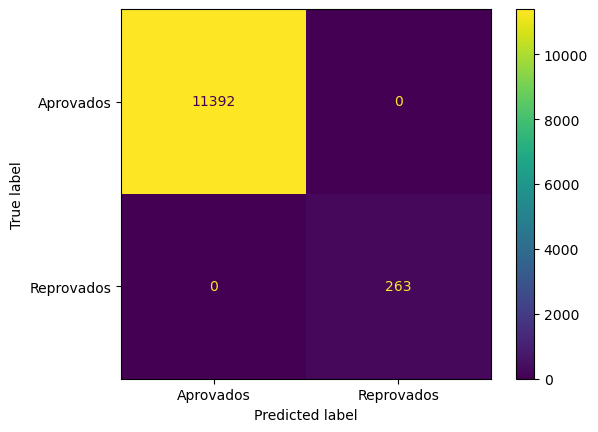

In [10]:
cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

In [11]:
predict = clf.predict(X_train)

In [12]:
accuracy_score(y_train, predict)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

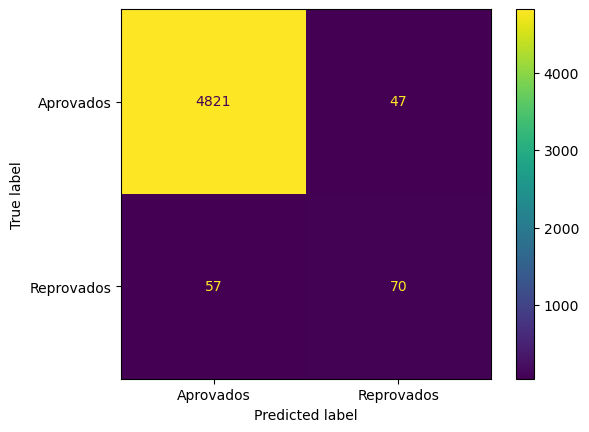

In [14]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

In [15]:
predict = clf.predict(X_test)

In [16]:
accuracy_score(y_test, predict)

0.9791791791791792

A acurácia do teste foi de 97,92% enquanto que o do treino foi de 100%

In [18]:
clf = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf = clf.fit(X_train,y_train)

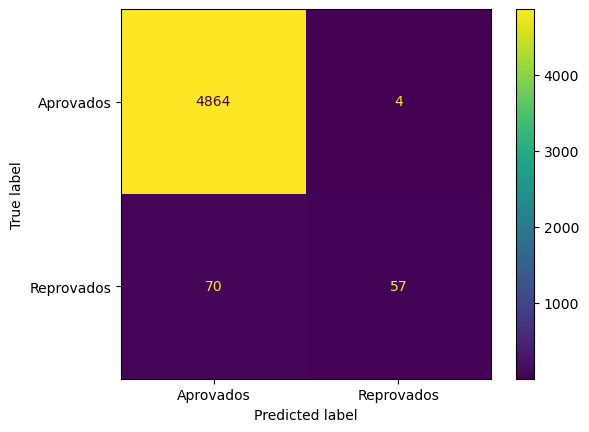

In [19]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

In [20]:
predict = clf.predict(X_test)

In [21]:
accuracy_score(y_test, predict)

0.9851851851851852

In [22]:
proporcao_aprovados = (predict == 0).sum() / len(predict)
proporcao_reprovados = (predict == 1).sum() / len(predict)

In [23]:
proporcao_aprovados*100

98.77877877877877

In [24]:
proporcao_reprovados*100

1.2212212212212212

Apenas 1,2% foram classificados como maus.

In [26]:
df['mau'] = df['mau'].replace(True, False)
df['mau'].value_counts()

mau
False    16650
Name: count, dtype: int64

In [27]:
y = df['mau']
X = df.drop('mau',axis=1)

In [28]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X,y)

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

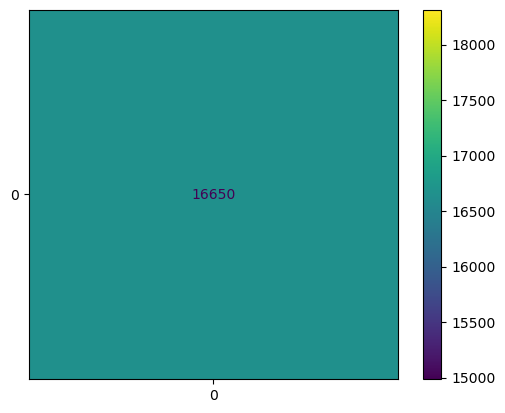

In [29]:
cm = confusion_matrix(y, clf.predict(X), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

In [ ]:
predict = clf.predict(X)
accuracy_score(y, predict)

In [ ]:
proporcao_aprovados = (predict == 0).sum() / len(predict)
proporcao_reprovados = (predict == 1).sum() / len(predict)

In [ ]:
proporcao_aprovados*100

In [ ]:
proporcao_reprovados*100

Se classificasse todos os contratos como 'bons', a acurácia ficaria de 100%.